In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 

## Emergency calls to 911 in Montegomery County, Pennsylvania, USA  https://www.kaggle.com/datasets/mchirico/montcoalert/data
data0 = pd.read_csv("/Users/siddhesh/Work/datasets/Emergency911Calls/911_original.csv")
#data0 = pd.read_csv("/Users/siddhesh/Work/datasets/Emergency911Calls/911_original.csv", parse_dates=['timeStamp']) # Read 'timeStamp' column as dataTime format
data0

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [2]:
data0.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
print("columns with na values::")
data0.isna().any()
    

columns with na values::


lat          False
lng          False
desc         False
zip           True
title        False
timeStamp    False
twp           True
addr         False
e            False
dtype: bool

In [5]:
data0[data0['zip'].isna()]['twp'].isna().any()

True

In [6]:
data0[data0['zip'].isna() & data0['twp'].isna()]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
1821,40.099265,-75.175706,CHURCH RD; ; Station 322; 2015-12-15 @ 11:31:36;,NaN,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-15 11:31:36,NaN,CHURCH RD,1
10103,40.229008,-75.387852,DEAD END; ; Station 318; 2016-01-06 @ 23:11:54;,NaN,EMS: OVERDOSE,2016-01-06 23:11:54,NaN,DEAD END,1
28851,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: SUBJECT IN PAIN,2016-02-20 22:17:11,NaN,NO LOCATION - NEIGHBORING COUNTY,1
36306,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: LACERATIONS,2016-03-11 14:11:44,NaN,NO LOCATION - NEIGHBORING COUNTY,1
36801,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: OVERDOSE,2016-03-12 21:11:33,NaN,NO LOCATION - NEIGHBORING COUNTY,1
...,...,...,...,...,...,...,...,...,...
657199,40.229008,-75.387852,PARV; ; 2020-07-11 @ 12:11:30-Station:STA74;,NaN,Fire: FIRE ALARM,2020-07-11 12:11:30,NaN,PARV,1
658485,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: CARDIAC EMERGENCY,2020-07-15 01:13:28,NaN,NO LOCATION - NEIGHBORING COUNTY,1
658999,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: OVERDOSE,2020-07-16 16:31:18,NaN,NO LOCATION - NEIGHBORING COUNTY,1
659226,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-17 12:33:06,NaN,NO LOCATION - NEIGHBORING COUNTY,1


In [7]:
print("Unique 'addresses' when 'zip' and 'township' are NaN:")
data0[data0['zip'].isna() & data0['twp'].isna()]['addr'].value_counts()

Unique 'addresses' when 'zip' and 'township' are NaN:


addr
NO LOCATION - NEIGHBORING COUNTY     118
SKIPPACK PIKE                          3
DEKALB PIKE                            3
CHURCH RD                              2
RT422 OVERPASS                         2
GRAVEL PENNDOT                         2
PUUR HOUSE                             2
DEAD END                               2
PHILA%                                 2
TERWOOD RD                             2
OLD LANCAST                            1
MANAYUNK VIADUCT                       1
BO                                     1
RAMP N GULPH RD TO I76 WB              1
GRYNEED CROSS                          1
GERM 845                               1
OLD GULPH RD                           1
SALFORDVILLE RD                        1
RAMP RT422 WB TO TOWNSHIP LINE RD      1
PERKIOMEN CREEK RD                     1
SULLIVANS TRL                          1
HORSHAM RD                             1
SYLVANIA AVENUE                        1
BRYANT                                 1
VAUGH LEWIS

In [8]:
print("Unique 'title' when 'zip' and 'township' are NaN:")
data0[data0['zip'].isna() & data0['twp'].isna()]['title'].value_counts()

Unique 'title' when 'zip' and 'township' are NaN:


title
EMS: VEHICLE ACCIDENT             33
EMS: UNKNOWN MEDICAL EMERGENCY    18
EMS: ASSAULT VICTIM               11
Fire: VEHICLE ACCIDENT            11
EMS: OVERDOSE                     10
EMS: RESPIRATORY EMERGENCY         6
EMS: CARDIAC EMERGENCY             5
EMS: FALL VICTIM                   5
EMS: FRACTURE                      4
EMS: UNCONSCIOUS SUBJECT           4
EMS: TRANSFERRED CALL              4
EMS: SUBJECT IN PAIN               4
EMS: DIABETIC EMERGENCY            3
EMS: STABBING                      3
EMS: SEIZURES                      3
Fire: RESCUE - WATER               3
Fire: VEHICLE FIRE                 3
EMS: NAUSEA/VOMITING               3
EMS: ALTERED MENTAL STATUS         3
EMS: LACERATIONS                   2
EMS: MEDICAL ALERT ALARM           2
EMS: ABDOMINAL PAINS               2
EMS: RESCUE - WATER                2
EMS: GENERAL WEAKNESS              2
Fire: FIRE ALARM                   2
Fire: FIRE POLICE NEEDED           2
EMS: SYNCOPAL EPISODE           

In [9]:
print("Unique 'description' when 'zip' and 'township' are NaN:")
data0[data0['zip'].isna() & data0['twp'].isna()]['desc'].value_counts()

Unique 'description' when 'zip' and 'township' are NaN:


desc
CHURCH RD;  ; Station 322; 2015-12-15 @ 11:31:36;                            1
NO LOCATION - NEIGHBORING COUNTY;  ; Station 381; 2019-07-22 @ 09:51:55;     1
NO LOCATION - NEIGHBORING COUNTY;  ; Station 308A; 2019-05-07 @ 01:22:09;    1
OLD LANCAST; ; 2019-05-07 @ 09:40:53-Station:STA23;                          1
NO LOCATION - NEIGHBORING COUNTY;  ; Station 339; 2019-05-12 @ 01:17:47;     1
                                                                            ..
TURNPIKE UNDERPASS; ; 2018-01-06 @ 17:46:27-Station:STA10;                   1
NO LOCATION - NEIGHBORING COUNTY;  ; Station 308; 2018-01-13 @ 13:51:59;     1
NO LOCATION - NEIGHBORING COUNTY;  ; Station 329; 2018-02-01 @ 20:54:35;     1
NO LOCATION - NEIGHBORING COUNTY;  ; Station EMS; 2018-02-09 @ 22:03:18;     1
NO LOCATION - NEIGHBORING COUNTY;  ; Station 356A; 2020-07-20 @ 03:34:03;    1
Name: count, Length: 169, dtype: int64

In [10]:
print("Unique 'addresses' when 'zip'is Nan and 'township' is not NaN:")
data0[data0['zip'].isna() & data0['twp'].notna()]['addr'].value_counts()

Unique 'addresses' when 'zip'is Nan and 'township' is not NaN:


addr
SCHUYLKILL EXPY & WEADLEY RD OVERPASS             1287
SCHUYLKILL EXPY & CONSHOHOCKEN STATE UNDERPASS    1160
NO LOCATION - NEIGHBORING COUNTY                   998
SCHUYLKILL EXPY & WAVERLY RD UNDERPASS             985
LIMEKILN PIKE & RT309 EXPY SB                      845
                                                  ... 
BUCKS MONT SPORT CENTER                              1
ELM ST                                               1
RAMP FROM 422 WB TO 100 NB                           1
KLK5274                                              1
WAS E BROA                                           1
Name: count, Length: 4097, dtype: int64

In [11]:
print("Unique 'addresses' when 'zip'is not Nan and 'township' is NaN:")
data0[data0['zip'].notna() & data0['twp'].isna()]['addr'].value_counts()

Unique 'addresses' when 'zip'is not Nan and 'township' is NaN:


addr
MAIN            6
RIDGE           4
WITMER RD       2
INVERNESS LN    2
WAWA            2
               ..
GERM            1
CARAS CT        1
JC PENNY        1
CARRABAS        1
ROSE            1
Name: count, Length: 101, dtype: int64

In [12]:
## Clean data
# Don't discard rows with Nan, instead fill Null values their

dataCleaned = data0.copy(deep=True)
dataCleaned['zip'].fillna(0.0, inplace=True)
dataCleaned['twp'].fillna('Nan', inplace=True)
print("Clean data. Don't discard rows with Nan, instead fill Null values their: ")
dataCleaned.info()

Clean data. Don't discard rows with Nan, instead fill Null values their: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        663522 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663522 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [13]:
#pd.Timestamp( dataCleaned['timeStamp'] )
print(f"{dataCleaned['timeStamp'].iloc[0] = }")
print(f"{pd.Timestamp(dataCleaned['timeStamp'].iloc[0]) = }")
print(f"{pd.to_datetime(dataCleaned['timeStamp'].iloc[0]) = }")


dataCleaned['timeStamp'].iloc[0] = '2015-12-10 17:10:52'
pd.Timestamp(dataCleaned['timeStamp'].iloc[0]) = Timestamp('2015-12-10 17:10:52')
pd.to_datetime(dataCleaned['timeStamp'].iloc[0]) = Timestamp('2015-12-10 17:10:52')


In [14]:
## convert timeStamp column to datetime format
dataCleaned['timeStamp'] = pd.to_datetime(dataCleaned['timeStamp'])
print("dataCleaned,info after converting timeStamp column to datatime format: ")
dataCleaned.info()

dataCleaned,info after converting timeStamp column to datatime format: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        663522 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663522 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 45.6+ MB


In [15]:
dataCleaned['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [16]:
dataCleaned[['timeStamp']]

,timeStamp
0,2015-12-10 17:10:52
1,2015-12-10 17:29:21
2,2015-12-10 14:39:21
3,2015-12-10 16:47:36
4,2015-12-10 16:56:52
...,...
663517,2020-07-29 15:46:51
663518,2020-07-29 15:52:19
663519,2020-07-29 15:52:52
663520,2020-07-29 15:54:08


In [17]:
print(f"{type(dataCleaned['timeStamp']) = }, {type(dataCleaned[['timeStamp']]) = }, ")

type(dataCleaned['timeStamp']) = <class 'pandas.core.series.Series'>, type(dataCleaned[['timeStamp']]) = <class 'pandas.core.frame.DataFrame'>, 


Data recorded for duration from 2015-12-10 14:39:21 to 2020-07-29 15:54:08.


timeStamp
2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: count, dtype: int64

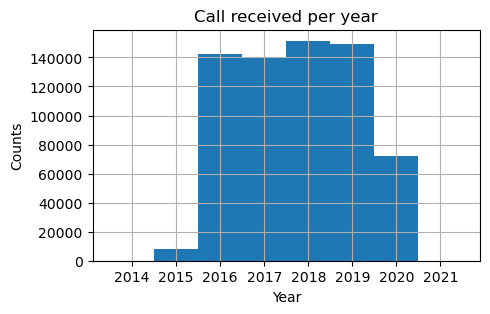

In [18]:
print(f"Data recorded for duration from {dataCleaned['timeStamp'].min()} to {dataCleaned['timeStamp'].max()}.")
fig, ax = plt.subplots(figsize=(5,3))
#dataCleaned['timeStamp'].dt.year.plot.hist(bins=(dataCleaned['timeStamp'].dt.year.max() - dataCleaned['timeStamp'].dt.year.min()), ax=ax)
#dataCleaned['timeStamp'].dt.year.plot.hist(bins=np.linspace(2014.5, 2020.5, 6), ax=ax)
#dataCleaned['timeStamp'].dt.year.plot.hist(bins=[2014,2015,2016,2017,2018,2019,2020,2021], ax=ax)
#dataCleaned['timeStamp'].dt.year.plot.hist(bins=range(2015,2022), ax=ax)
dataCleaned['timeStamp'].dt.year.plot.hist(bins=np.arange(2013.5, 2022.5, 1.0), ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Counts'); ax.set_title('Call received per year'); 
ax.grid()

dataCleaned['timeStamp'].dt.year.value_counts()

Text(0.5, 1.0, 'Calls received per year')

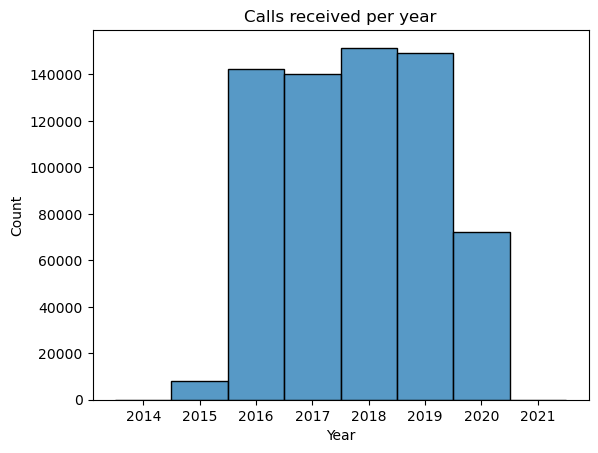

In [19]:
fig = sns.histplot(
    data=dataCleaned,
    x=dataCleaned['timeStamp'].dt.year,
    #bins=np.arange(2013.5, 2022.5, 1.0)
    binwidth=1.0,
    binrange=[2013.5,2021.5]
    )
fig.set_xlabel('Year')
fig.set_title('Calls received per year')

Text(0.5, 1.0, 'Calls received per month of year')

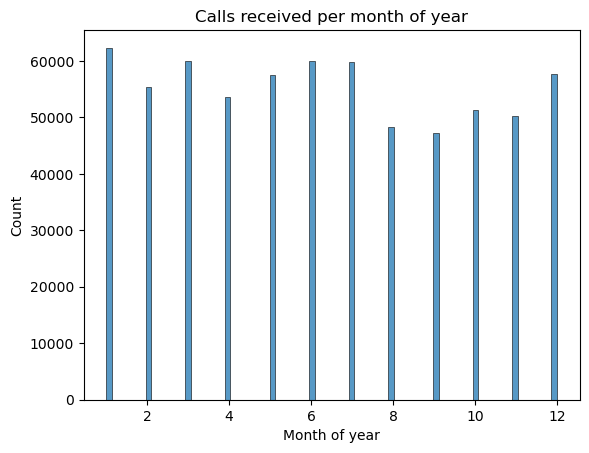

In [20]:
fig = sns.histplot(
    data=dataCleaned,
    x=dataCleaned['timeStamp'].dt.month,
    #bins=np.arange(2013.5, 2022.5, 1.0)
    #binwidth=1.0,
    #binrange=[2013.5,2021.5]
    )
fig.set_xlabel('Month of year')
fig.set_title('Calls received per month of year')

In [21]:
dataCleaned['timeStampYear'] = dataCleaned['timeStamp'].dt.year
dataCleaned['timeStampMonth'] = dataCleaned['timeStamp'].dt.month
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lat             663522 non-null  float64       
 1   lng             663522 non-null  float64       
 2   desc            663522 non-null  object        
 3   zip             663522 non-null  float64       
 4   title           663522 non-null  object        
 5   timeStamp       663522 non-null  datetime64[ns]
 6   twp             663522 non-null  object        
 7   addr            663522 non-null  object        
 8   e               663522 non-null  int64         
 9   timeStampYear   663522 non-null  int32         
 10  timeStampMonth  663522 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 50.6+ MB


In [22]:
dataCleaned.groupby(['timeStampYear', 'timeStampMonth'], )['title'].count()

timeStampYear  timeStampMonth
2015           12                 7916
2016           1                 13096
               2                 11396
               3                 11059
               4                 11287
               5                 11374
               6                 11732
               7                 12088
               8                 11904
               9                 11669
               10                12502
               11                12091
               12                12162
2017           1                 11605
               2                 10267
               3                 11684
               4                 11056
               5                 11719
               6                 12333
               7                 11768
               8                 11753
               9                 11332
               10                12337
               11                11548
               12                1

<Axes: xlabel='timeStampYear,timeStampMonth'>

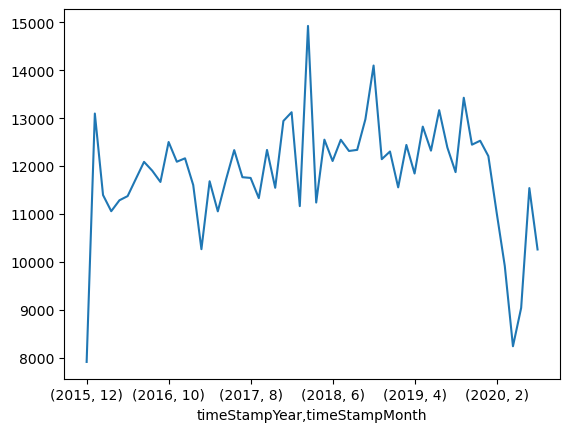

In [23]:
dataCleaned.groupby(['timeStampYear', 'timeStampMonth'], )['title'].count().plot()

/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_90128/3268021538.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


Text(0.5, 1.0, 'Calls received per month of year')

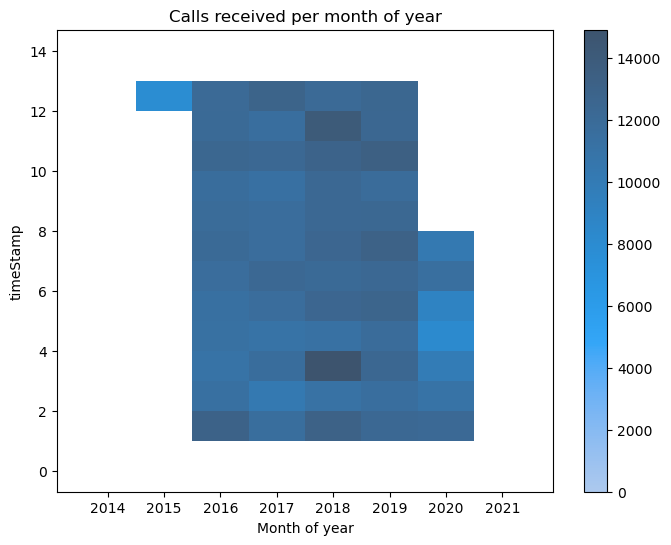

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(
    data=dataCleaned,
    x=dataCleaned['timeStamp'].dt.year,
    y=dataCleaned['timeStamp'].dt.month,
    #bins=np.arange(2013.5, 2022.5, 1.0)
    binwidth=1.0,
    binrange=([2013.5,2021.5],[0,14]),
    #ax=ax
    cbar=True,
    palette='viridis'
    )
ax.set_xlabel('Year'); ax.set_xlabel('Month of year')
ax.set_title('Calls received per month of year')

In [25]:
dataCleaned[dataCleaned['zip']>0].value_counts('zip')

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
           ...  
19023.0        1
19018.0        1
18938.0        1
18911.0        1
77316.0        1
Name: count, Length: 204, dtype: int64

In [26]:
## Call title sorted by occurance
print("Call title sorted by occurance: ")
dataCleaned.value_counts('title')

Call title sorted by occurance: 


title
Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
                                ...  
EMS: VEHICLE LEAKING FUEL           1
Fire: CVA/STROKE                    1
Fire: ANIMAL COMPLAINT              1
Fire: BARRICADED SUBJECT            1
EMS: POLICE INFORMATION             1
Name: count, Length: 148, dtype: int64

In [27]:
dataCleaned.groupby(['title'], sort=False)['timeStampYear'].value_counts()

title                            timeStampYear
EMS: ABDOMINAL PAINS             2016             2029
                                 2017             2004
                                 2019             1933
                                 2018             1870
                                 2020             1041
                                                  ... 
Traffic: VEHICLE LEAKING FUEL -  2017               71
                                 2018               60
                                 2019               37
                                 2020               22
                                 2015                7
Name: count, Length: 676, dtype: int64

In [28]:
## Most common year to receive 'call title'
print("Most common year to receive 'call title':")
print(dataCleaned.groupby(['title'], sort=False)['timeStampYear'].agg(pd.Series.mode).to_string())

Most common year to receive 'call title':
title
EMS: BACK PAINS/INJURY                                2019
EMS: DIABETIC EMERGENCY                               2018
Fire: GAS-ODOR/LEAK                                   2016
EMS: CARDIAC EMERGENCY                                2019
EMS: DIZZINESS                                        2018
EMS: HEAD INJURY                                      2019
EMS: NAUSEA/VOMITING                                  2019
EMS: RESPIRATORY EMERGENCY                            2019
EMS: SYNCOPAL EPISODE                                 2016
Traffic: VEHICLE ACCIDENT -                           2018
EMS: VEHICLE ACCIDENT                                 2017
Traffic: DISABLED VEHICLE -                           2018
Fire: APPLIANCE FIRE                                  2016
EMS: GENERAL WEAKNESS                                 2019
Fire: CARBON MONOXIDE DETECTOR                        2018
EMS: UNKNOWN MEDICAL EMERGENCY                        2016
EMS: UNR

In [29]:
data_TitleYearCount = dataCleaned.groupby(['title', 'timeStampYear'], sort=False)['timeStamp'].count()
data_TitleYearCount

title                       timeStampYear
EMS: BACK PAINS/INJURY      2015              69
EMS: DIABETIC EMERGENCY     2015              80
Fire: GAS-ODOR/LEAK         2015              83
EMS: CARDIAC EMERGENCY      2015             423
EMS: DIZZINESS              2015              69
                                            ... 
EMS: DROWNING               2020               2
Fire: UNCONSCIOUS SUBJECT   2020               1
Fire: EMS SPECIAL SERVICE   2020               1
Fire: ROAD OBSTRUCTION      2020               1
Fire: UNRESPONSIVE SUBJECT  2020               1
Name: timeStamp, Length: 676, dtype: int64

In [30]:
data_TitleYearCount.reset_index().pivot_table(index='title', columns='timeStampYear', values='timeStamp')

timeStampYear,2015,2016,2017,2018,2019,2020
title,,,,,,
EMS: ABDOMINAL PAINS,128.0,2029.0,2004.0,1870.0,1933.0,1041.0
EMS: ACTIVE SHOOTER,NaN,2.0,NaN,1.0,NaN,NaN
EMS: ALLERGIC REACTION,37.0,601.0,627.0,667.0,652.0,294.0
EMS: ALTERED MENTAL STATUS,99.0,2011.0,2119.0,2234.0,2292.0,1333.0
EMS: AMPUTATION,1.0,24.0,14.0,27.0,29.0,4.0
...,...,...,...,...,...,...
Traffic: HAZARDOUS ROAD CONDITIONS -,37.0,1401.0,1073.0,2170.0,1569.0,583.0
Traffic: ROAD OBSTRUCTION -,192.0,4383.0,4213.0,5790.0,5560.0,3097.0
Traffic: VEHICLE ACCIDENT -,2151.0,33490.0,32776.0,34349.0,33406.0,12200.0


<Axes: xlabel='timeStampYear', ylabel='title'>

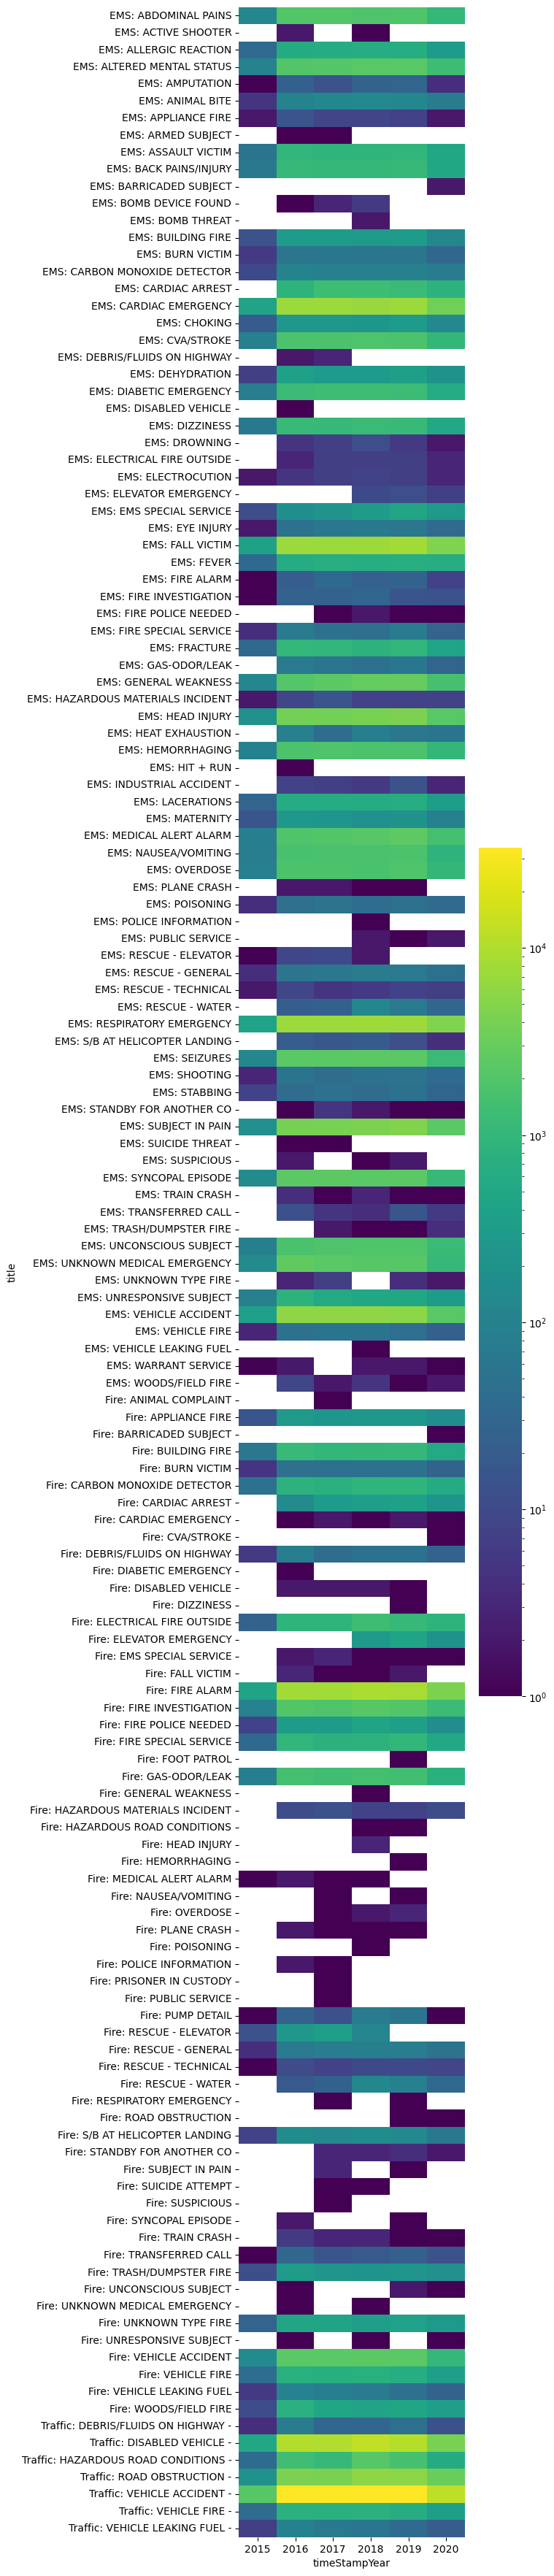

In [31]:
fig, ax = plt.subplots(figsize=(5,45))
sns.heatmap(data_TitleYearCount.reset_index().pivot_table(index='title', columns='timeStampYear', values='timeStamp'), ax=ax, norm=mpl.colors.LogNorm(), cmap=mpl.colormaps['viridis'])

In [32]:
#dataCleaned.groupby(['title'])['zip']
dataCleaned.zip.value_counts()

zip
0.0        80199
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
           ...  
17901.0        1
19134.0        1
19135.0        1
8502.0         1
18938.0        1
Name: count, Length: 205, dtype: int64

In [33]:
dataCleaned.twp.value_counts()

twp
LOWER MERION     55490
ABINGTON         39947
NORRISTOWN       37633
UPPER MERION     36010
CHELTENHAM       30574
                 ...  
BRYN ATHYN        1254
GREEN LANE         385
Nan                293
PHILA COUNTY       267
LEHIGH COUNTY      190
Name: count, Length: 69, dtype: int64

Text(0.5, 1.0, 'Call title occarance')

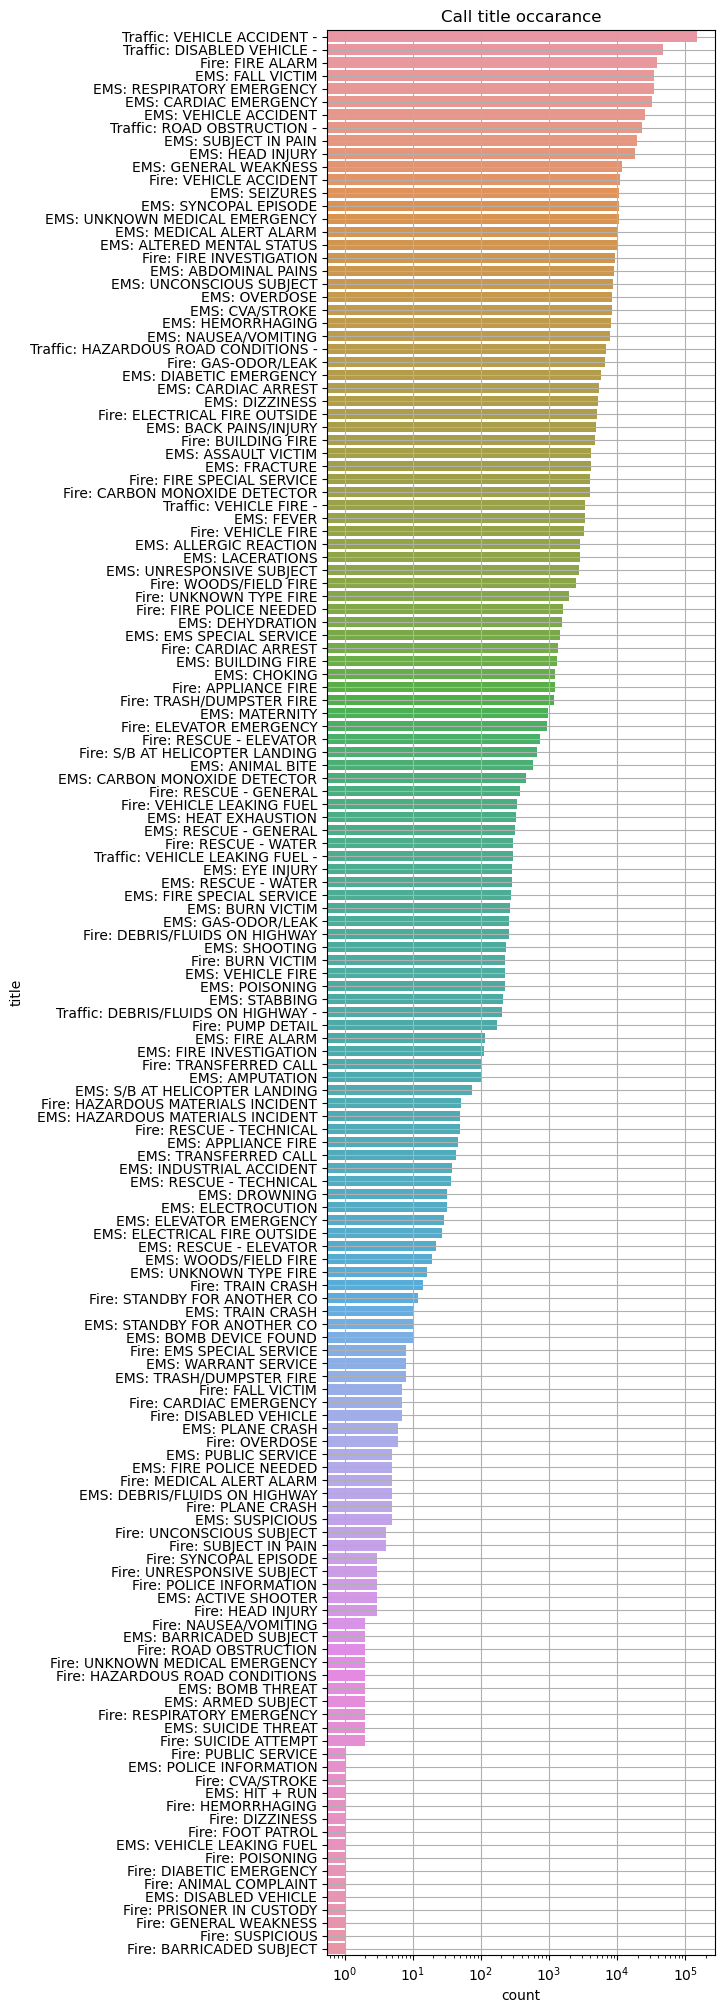

In [34]:
fig, ax = plt.subplots(figsize=(5,25))
sns.countplot(data=dataCleaned, y='title', ax=ax, orient='x', order=dataCleaned['title'].value_counts().index)
ax.set_xscale('log');
ax.grid()
ax.set_title('Call title occarance')


Text(0.5, 1.0, 'Call township occarance')

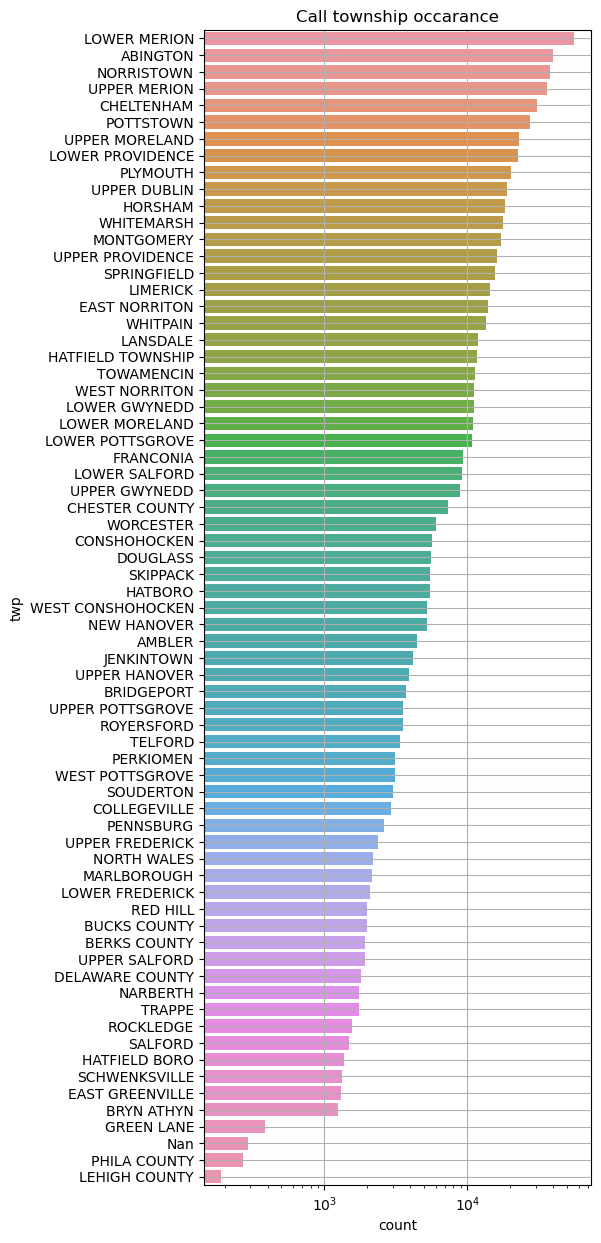

In [35]:
fig, ax = plt.subplots(figsize=(5,15))
sns.countplot(data=dataCleaned, y='twp', ax=ax, orient='x', order=dataCleaned['twp'].value_counts().index)
ax.set_xscale('log');
ax.grid()
ax.set_title('Call township occarance')

In [36]:
print(dataCleaned.groupby(['twp', 'zip'])['title'].count().to_string())

twp                zip    
ABINGTON           0.0         1810
                   18054.0        1
                   18940.0        1
                   18964.0        1
                   19001.0     9877
                   19002.0       31
                   19006.0     2828
                   19009.0       35
                   19012.0       15
                   19025.0       30
                   19027.0     2124
                   19031.0        2
                   19035.0        2
                   19038.0     6295
                   19040.0       26
                   19044.0        3
                   19046.0    11946
                   19075.0       16
                   19087.0        3
                   19090.0     4562
                   19095.0      185
                   19111.0      130
                   19115.0       11
                   19118.0        1
                   19348.0        1
                   19401.0        3
                   19406.0        2
 

In [37]:
print(dataCleaned.groupby(['zip', 'twp'])['title'].count().to_string())

zip      twp              
0.0      ABINGTON              1810
         AMBLER                  57
         BERKS COUNTY           609
         BRIDGEPORT             690
         BRYN ATHYN              81
         BUCKS COUNTY           661
         CHELTENHAM            3927
         CHESTER COUNTY        3347
         COLLEGEVILLE             8
         CONSHOHOCKEN            90
         DELAWARE COUNTY        224
         DOUGLASS               991
         EAST GREENVILLE         30
         EAST NORRITON          431
         FRANCONIA              996
         HATBORO                199
         HATFIELD BORO         1160
         HATFIELD TOWNSHIP      779
         HORSHAM               1239
         JENKINTOWN             110
         LANSDALE               367
         LEHIGH COUNTY           33
         LIMERICK               336
         LOWER FREDERICK         86
         LOWER GWYNEDD         2011
         LOWER MERION          8003
         LOWER MORELAND         541
 

In [38]:
dataCleaned[dataCleaned['zip'] == 19525.0].value_counts('twp')

twp
DOUGLASS            2985
NEW HANOVER         2967
UPPER POTTSGROVE      20
UPPER FREDERICK        8
BERKS COUNTY           3
LIMERICK               3
Nan                    2
POTTSTOWN              2
EAST GREENVILLE        1
FRANCONIA              1
LOWER MORELAND         1
UPPER DUBLIN           1
UPPER HANOVER          1
UPPER MERION           1
UPPER MORELAND         1
Name: count, dtype: int64

In [39]:
dataCleaned.value_counts('zip')

zip
0.0        80199
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
           ...  
18040.0        1
18042.0        1
19140.0        1
19135.0        1
77316.0        1
Name: count, Length: 205, dtype: int64

In [40]:
dataCleaned.value_counts('twp')

twp
LOWER MERION     55490
ABINGTON         39947
NORRISTOWN       37633
UPPER MERION     36010
CHELTENHAM       30574
                 ...  
BRYN ATHYN        1254
GREEN LANE         385
Nan                293
PHILA COUNTY       267
LEHIGH COUNTY      190
Name: count, Length: 69, dtype: int64

In [41]:
dataCleaned[dataCleaned.zip > 0].zip.describe()

count    583323.000000
mean      19236.055791
std         298.222637
min        1104.000000
25%       19038.000000
50%       19401.000000
75%       19446.000000
max       77316.000000
Name: zip, dtype: float64

Text(0.5, 1.0, 'Call township vs zip occarance')

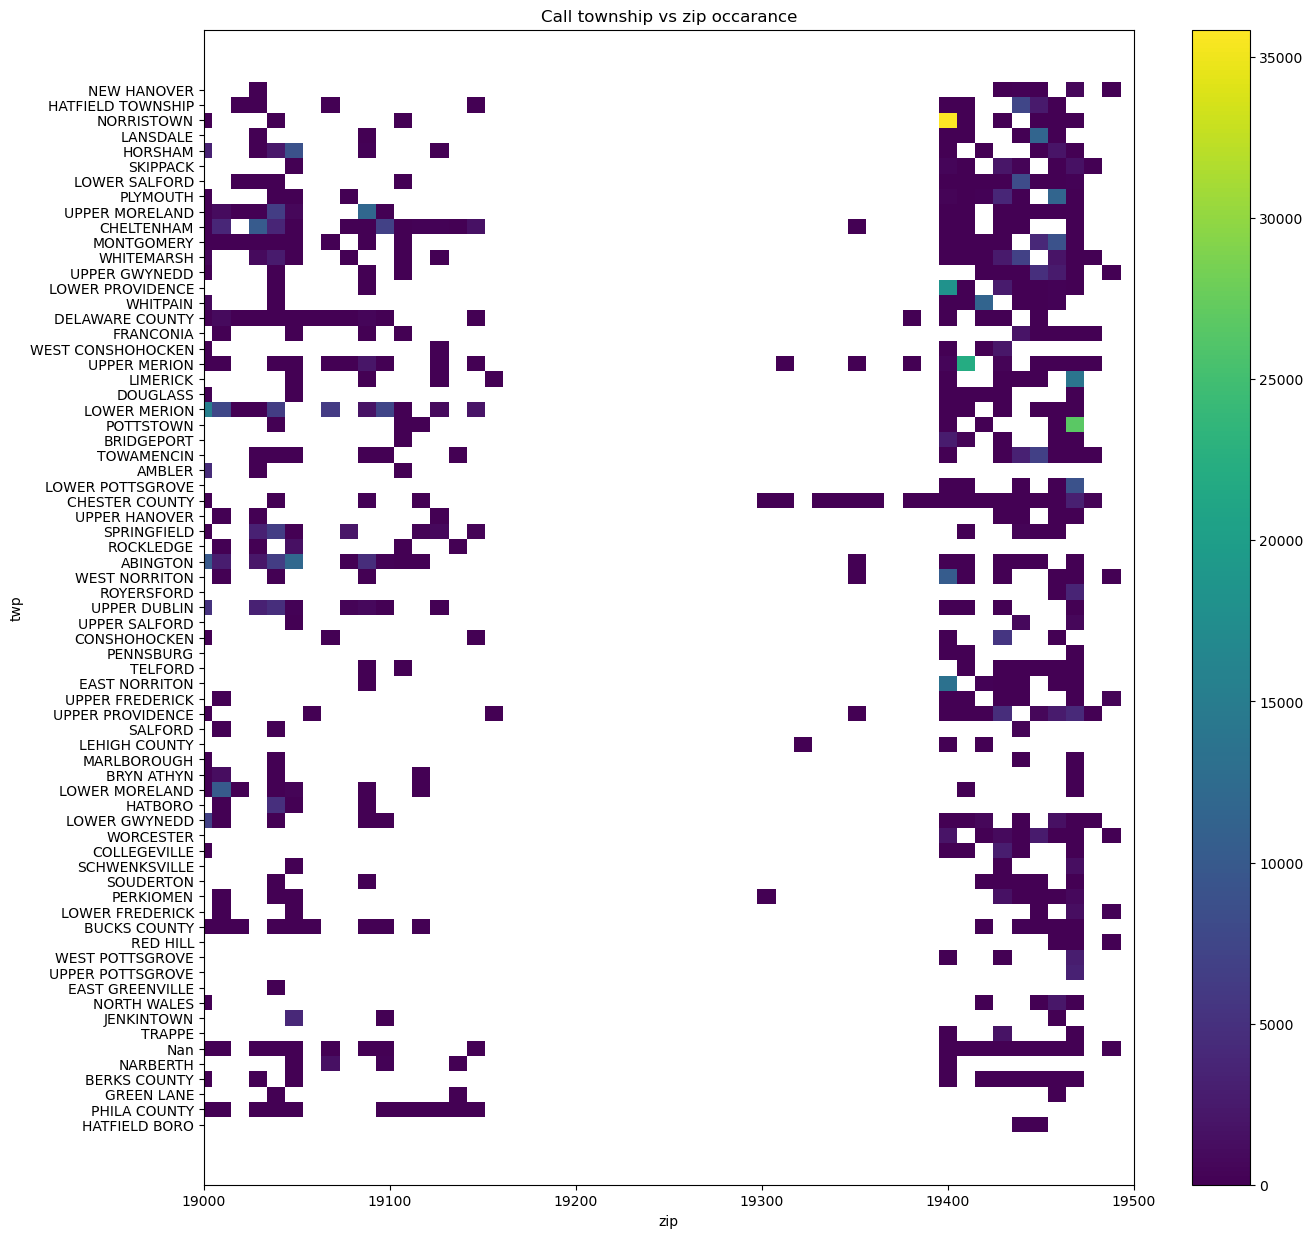

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
sns.histplot(data=dataCleaned[dataCleaned.zip > 0], x='zip', y='twp', ax=ax, cbar=True, cmap=mpl.colormaps['viridis'])
ax.set_xlim(19000, 19500);
ax.set_title('Call township vs zip occarance')

In [43]:
dataPT_TitleTwp = dataCleaned.groupby(['title','twp']).count().reset_index().pivot_table(index='title', columns='twp', values='timeStamp')
dataPT_TitleTwp.fillna(0.0, inplace=True)
dataPT_TitleTwp

twp,ABINGTON,AMBLER,BERKS COUNTY,BRIDGEPORT,BRYN ATHYN,BUCKS COUNTY,CHELTENHAM,CHESTER COUNTY,COLLEGEVILLE,CONSHOHOCKEN,...,UPPER MORELAND,UPPER POTTSGROVE,UPPER PROVIDENCE,UPPER SALFORD,WEST CONSHOHOCKEN,WEST NORRITON,WEST POTTSGROVE,WHITEMARSH,WHITPAIN,WORCESTER
title,,,,,,,,,,,,,,,,,,,,,
EMS: ABDOMINAL PAINS,536.0,53.0,41.0,69.0,18.0,29.0,383.0,116.0,40.0,77.0,...,333.0,30.0,172.0,19.0,14.0,140.0,33.0,151.0,155.0,64.0
EMS: ACTIVE SHOOTER,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EMS: ALLERGIC REACTION,145.0,14.0,18.0,16.0,7.0,8.0,101.0,28.0,15.0,22.0,...,93.0,8.0,87.0,8.0,10.0,41.0,10.0,55.0,60.0,17.0
EMS: ALTERED MENTAL STATUS,765.0,105.0,62.0,53.0,8.0,13.0,450.0,85.0,51.0,51.0,...,398.0,35.0,273.0,13.0,17.0,174.0,22.0,249.0,201.0,108.0
EMS: AMPUTATION,5.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,1.0,3.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Traffic: HAZARDOUS ROAD CONDITIONS -,394.0,32.0,6.0,73.0,21.0,11.0,195.0,97.0,40.0,51.0,...,252.0,57.0,145.0,17.0,108.0,102.0,59.0,217.0,85.0,49.0
Traffic: ROAD OBSTRUCTION -,1376.0,106.0,5.0,110.0,67.0,30.0,1068.0,496.0,90.0,250.0,...,662.0,162.0,628.0,76.0,293.0,239.0,163.0,865.0,468.0,218.0
Traffic: VEHICLE ACCIDENT -,8354.0,583.0,46.0,708.0,238.0,522.0,7823.0,1718.0,565.0,738.0,...,5536.0,721.0,4048.0,497.0,2316.0,2442.0,489.0,4406.0,3291.0,1499.0


/Users/siddhesh/anaconda3/envs/ds1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/siddhesh/anaconda3/envs/ds1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


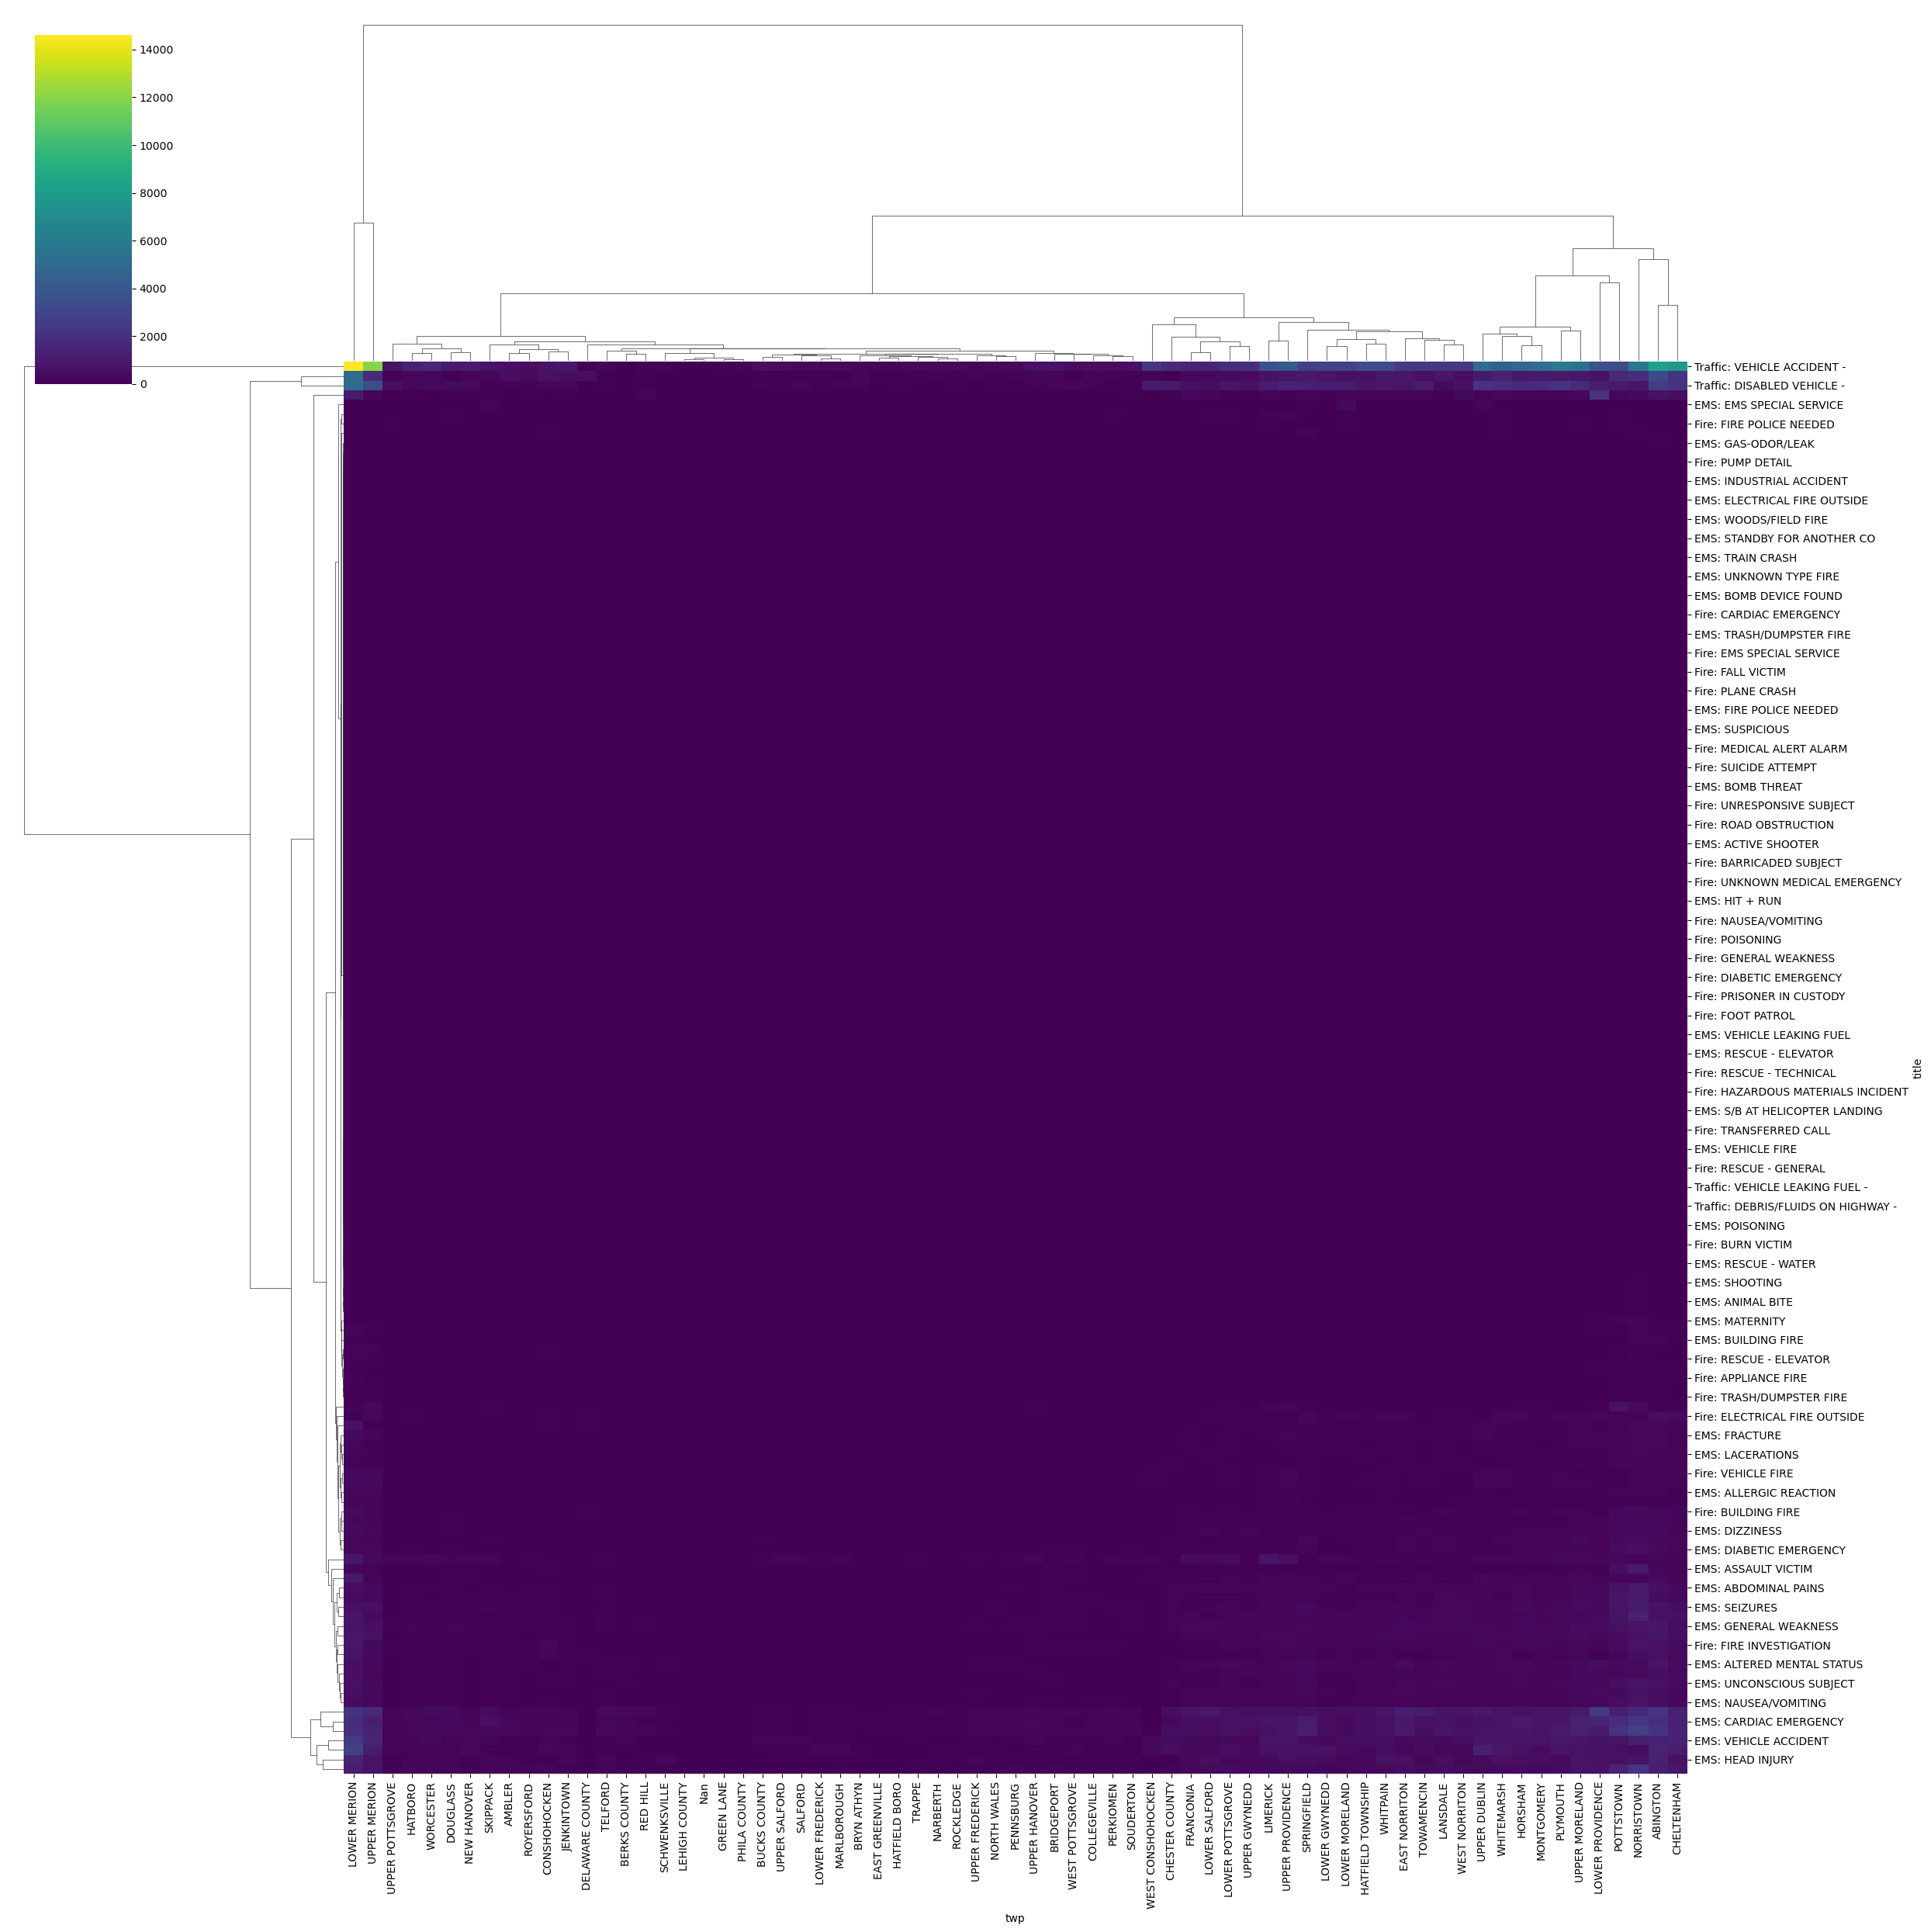

In [44]:
#fig, ax = plt.subplots(figsize=(25,25))
fig = sns.clustermap(data=dataPT_TitleTwp, figsize=(25,25), cmap=mpl.colormaps['viridis'])
#fig.set_title("Call title vs township clustermap")

In [45]:
dataPT_TitleZip = dataCleaned.groupby(['title','zip']).count().reset_index().pivot_table(index='title', columns='zip', values='timeStamp')
dataPT_TitleZip.fillna(0.0, inplace=True)
dataPT_TitleZip

zip,0.0,1104.0,3103.0,3366.0,7081.0,7203.0,7726.0,8033.0,8065.0,8077.0,...,19602.0,19604.0,19605.0,19607.0,19609.0,19610.0,21701.0,23005.0,36107.0,77316.0
title,,,,,,,,,,,,,,,,,,,,,
EMS: ABDOMINAL PAINS,510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
EMS: ACTIVE SHOOTER,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EMS: ALLERGIC REACTION,179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EMS: ALTERED MENTAL STATUS,541.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EMS: AMPUTATION,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Traffic: HAZARDOUS ROAD CONDITIONS -,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Traffic: ROAD OBSTRUCTION -,4728.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
Traffic: VEHICLE ACCIDENT -,23258.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


/Users/siddhesh/anaconda3/envs/ds1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/siddhesh/anaconda3/envs/ds1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


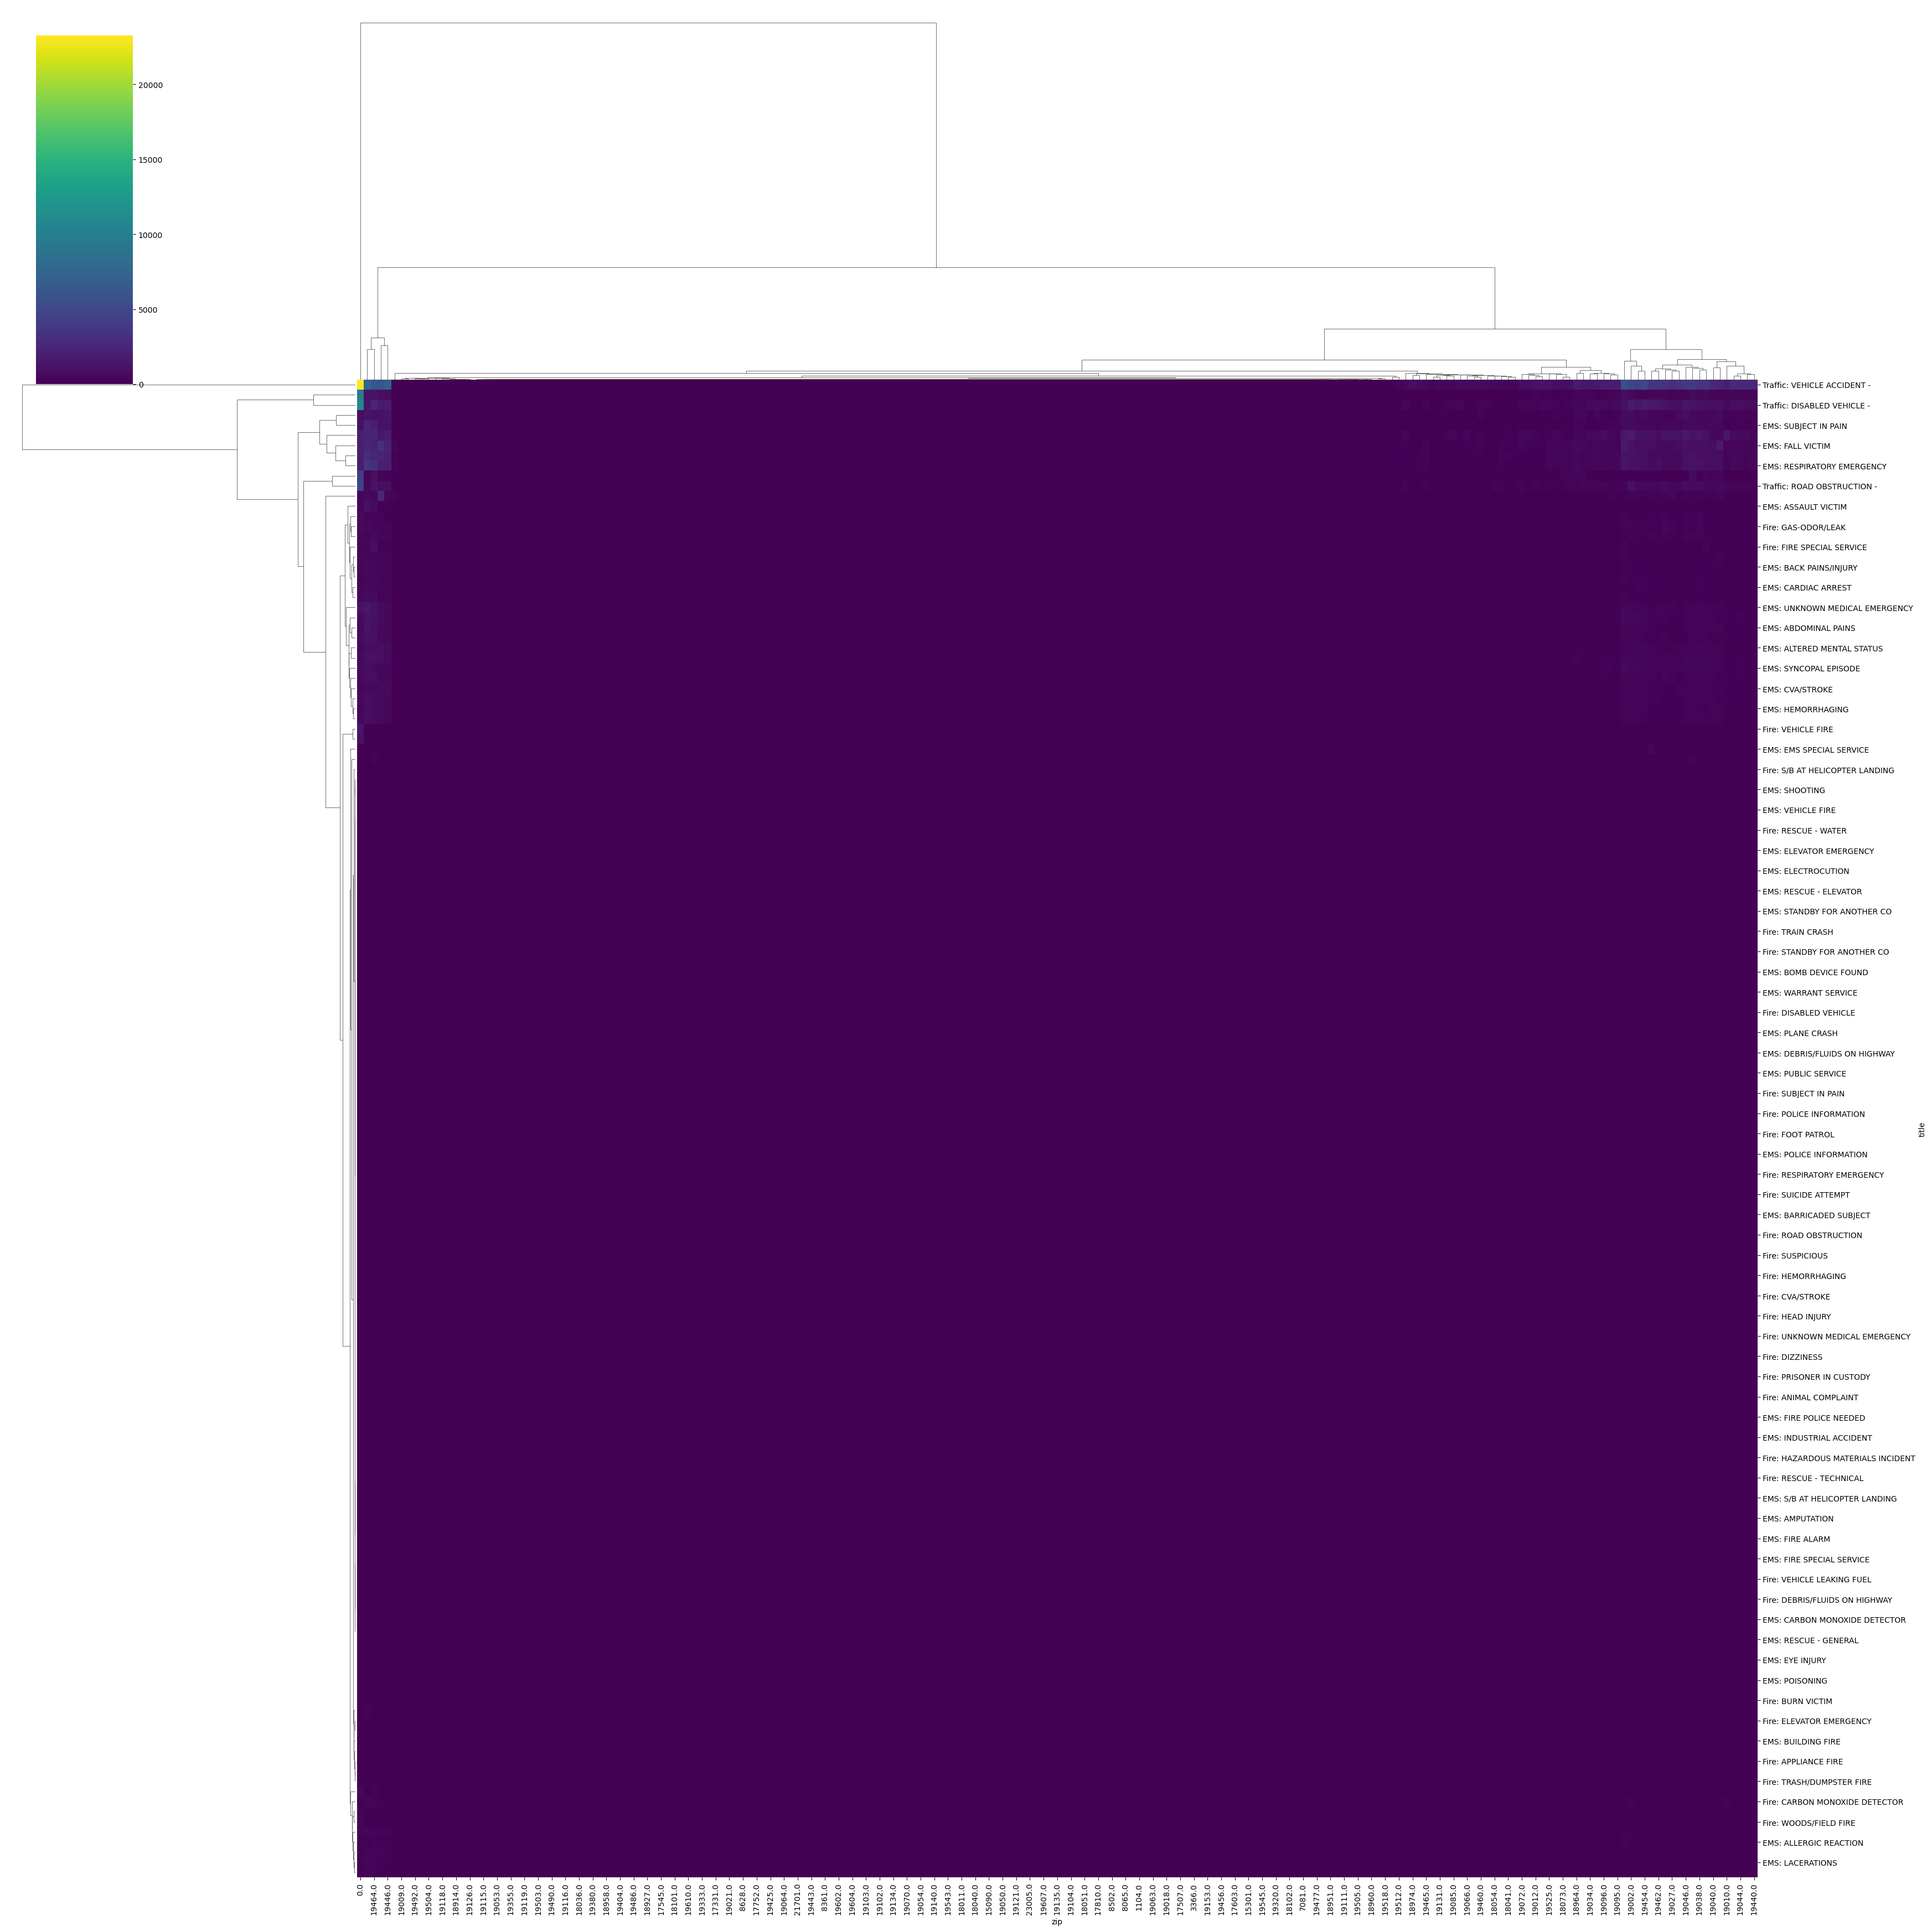

In [46]:
fig = sns.clustermap(data=dataPT_TitleZip, figsize=(35,35), cmap=mpl.colormaps['viridis'])

In [47]:
dataCleaned.describe()

,lat,lng,zip,timeStamp,e,timeStampYear,timeStampMonth
count,663522.000000,663522.000000,663522.000000,663522,663522.0,663522.000000,663522.000000
mean,40.158162,-75.300105,16911.019939,2018-04-02 07:50:18.720310784,1.0,2017.766131,6.334414
min,0.000000,-119.698206,0.000000,2015-12-10 14:39:21,1.0,2015.000000,1.000000
25%,40.100344,-75.392735,19006.000000,2017-02-11 19:27:28.750000128,1.0,2017.000000,3.000000
50%,40.143927,-75.305143,19151.000000,2018-04-06 08:18:16.500000,1.0,2018.000000,6.000000
75%,40.229008,-75.211865,19438.000000,2019-05-19 04:00:10,1.0,2019.000000,9.000000
max,51.335390,87.854975,77316.000000,2020-07-29 15:54:08,1.0,2020.000000,12.000000
std,0.220641,1.672884,6276.700882,NaN,0.0,1.335193,3.475113


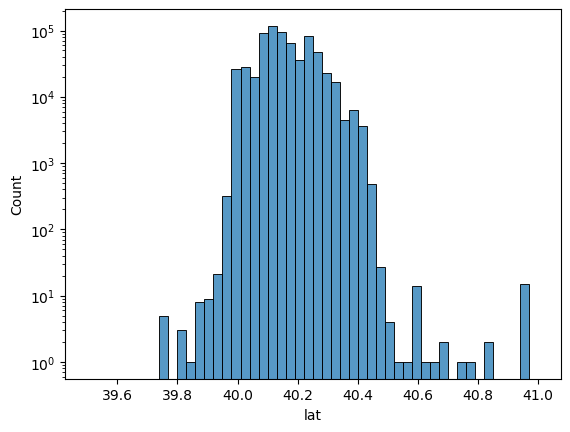

In [48]:
fig, ax = plt.subplots()
sns.histplot(data=dataCleaned, x='lat', ax=ax, bins=50, binrange=[39.5,41])
ax.set_yscale('log'); #ax.set_xlim(39,42)

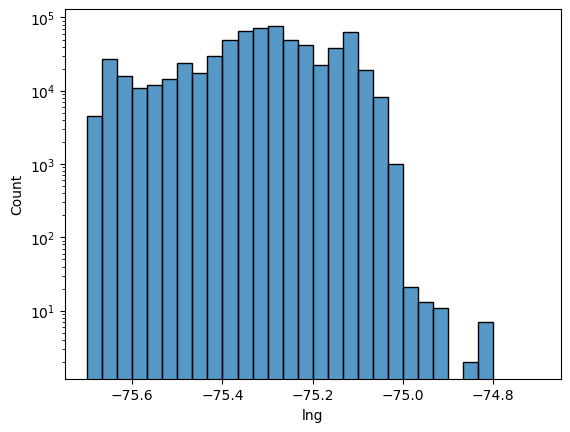

In [49]:
fig, ax = plt.subplots()
sns.histplot(data=dataCleaned, x='lng', ax=ax, bins=30, binrange=[-75.7, -74.7])
ax.set_yscale('log'); #ax.set_xlim(39,42)

<Axes: xlabel='lat', ylabel='lng'>

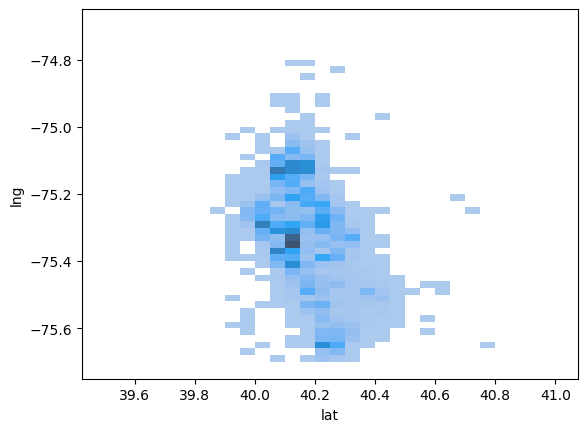

In [50]:
fig, ax = plt.subplots()
sns.histplot(data=dataCleaned, x='lat', y='lng', ax=ax, bins=[30,50], binrange=[[39.5,41], [-75.7, -74.7]])
#ax.set_yscale('log'); #ax.set_xlim(39,42)

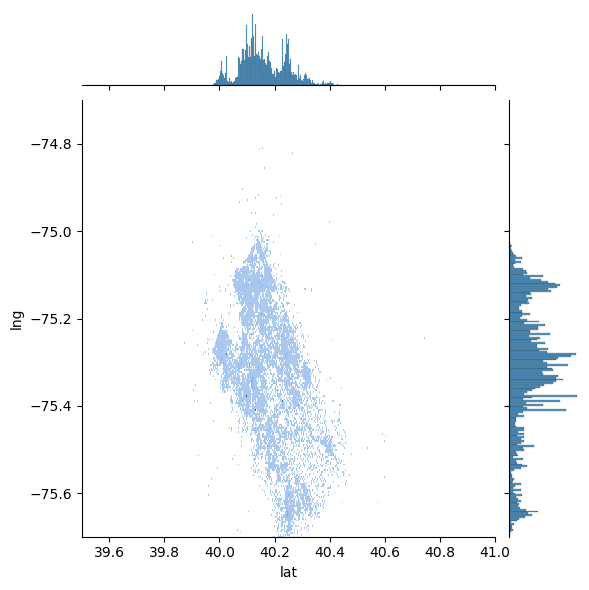

In [51]:
sns.jointplot(data=dataCleaned, x='lat', y='lng', xlim=[39.5,41], ylim=[-75.7, -74.7], kind='hist')

In [52]:
titles_MostFrequent = list(dataCleaned.value_counts('title').index)[:3]
titles_MostFrequent

['Traffic: VEHICLE ACCIDENT -',
 'Traffic: DISABLED VEHICLE -',
 'Fire: FIRE ALARM']

In [53]:
mask_TopTitles = None
for i, title in enumerate(titles_MostFrequent):
    mask_tmp_ = dataCleaned['title'].str.fullmatch(title)
    if i==0: mask_TopTitles = mask_tmp_
    else:    mask_TopTitles = (mask_TopTitles | mask_tmp_)
    #print(f"{i = }, {mask_tmp_.sum() = }, {mask_TopTitles.sum() = }")
#mask_TopTitles.sum()
dataCleaned[mask_TopTitles]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStampYear,timeStampMonth
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,2015,12
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,0.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1,2015,12
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,2015,12
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,2015,12
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,2015,12
...,...,...,...,...,...,...,...,...,...,...,...
663504,40.132636,-75.378327,MAIN ST & JEFFERSON AVE; WEST NORRITON; 2020-0...,19403.0,Traffic: DISABLED VEHICLE -,2020-07-29 15:25:36,WEST NORRITON,MAIN ST & JEFFERSON AVE,1,2020,7
663507,40.101385,-75.099434,SUSQUEHANNA RD & MEETINGHOUSE RD; ABINGTON; 20...,19046.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:28:16,ABINGTON,SUSQUEHANNA RD & MEETINGHOUSE RD,1,2020,7
663516,40.066632,-75.143610,CHELSEA RD & EUSTON RD; CHELTENHAM; 2020-07-29...,19027.0,Fire: FIRE ALARM,2020-07-29 15:38:40,CHELTENHAM,CHELSEA RD & EUSTON RD,1,2020,7
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,2020,7


In [54]:
## this plot crashes the code
#sns.jointplot(data=dataCleaned[mask_TopTitles], x='lat', y='lng', hue='title', xlim=[39.5,41], ylim=[-75.7, -74.7], kind='hist')

: 

: 